In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn .linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

%matplotlib inline

In [18]:
df = pd.read_csv('WineQT.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [23]:
df.drop(columns=['Id'],inplace=True)

In [24]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [32]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
x = df.iloc[:,0:11]
y = df.iloc[:,-1]


In [34]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
xtrain

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.5
758,9.9,0.32,0.56,2.0,0.073,3.0,8.0,0.99534,3.15,0.73,11.4
636,8.9,0.31,0.36,2.6,0.056,10.0,39.0,0.99562,3.40,0.69,11.8
1109,6.6,0.88,0.04,2.2,0.066,12.0,20.0,0.99636,3.53,0.56,9.9
743,7.6,0.42,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.1
...,...,...,...,...,...,...,...,...,...,...,...
1044,6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0
1095,8.0,0.39,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0
1130,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9
860,7.9,0.57,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5


In [35]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

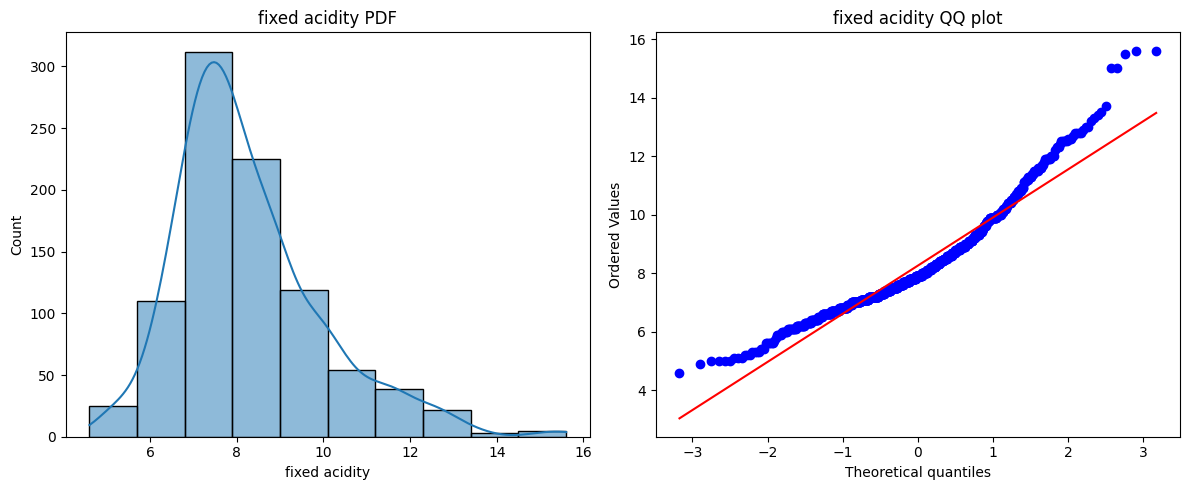

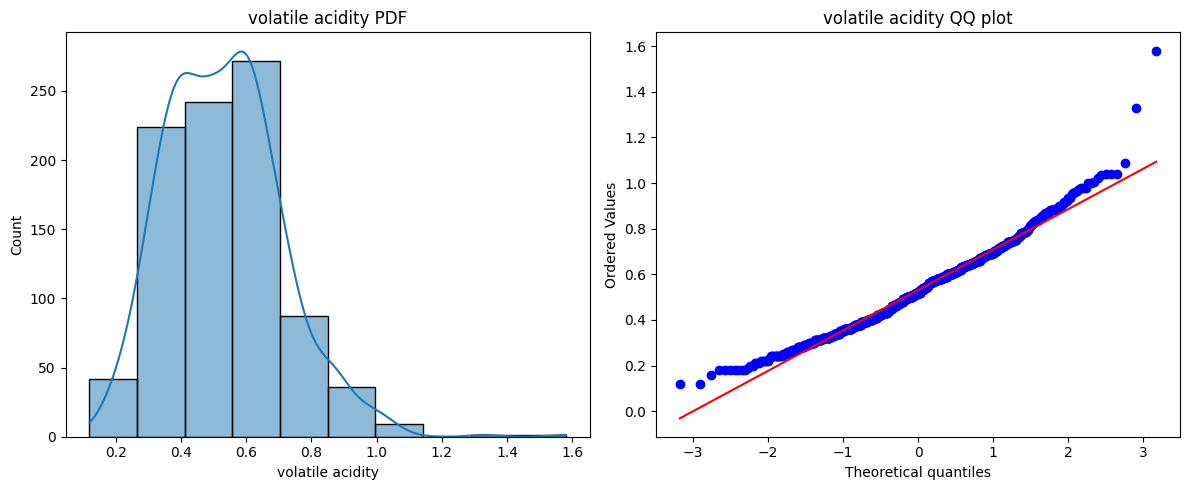

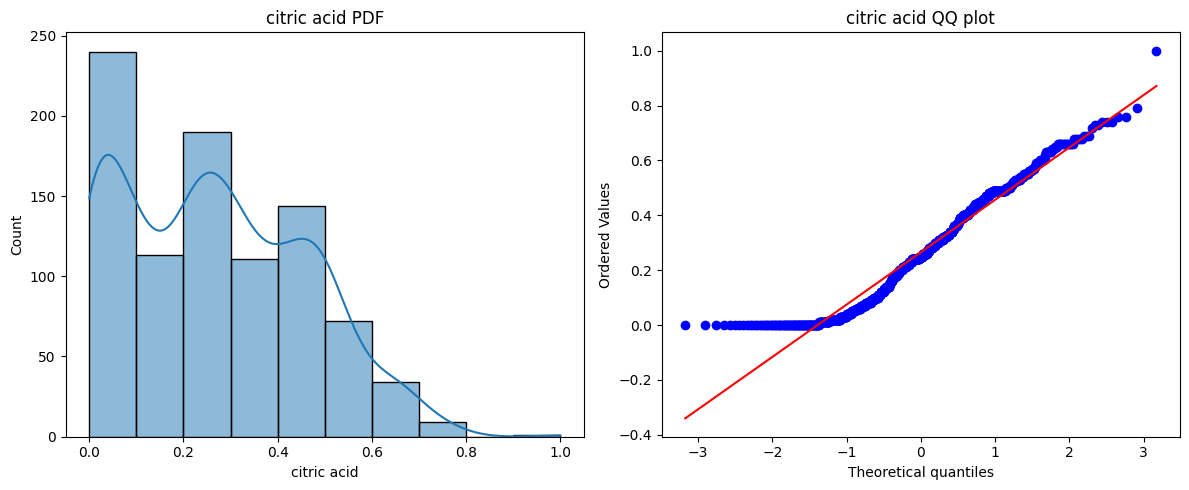

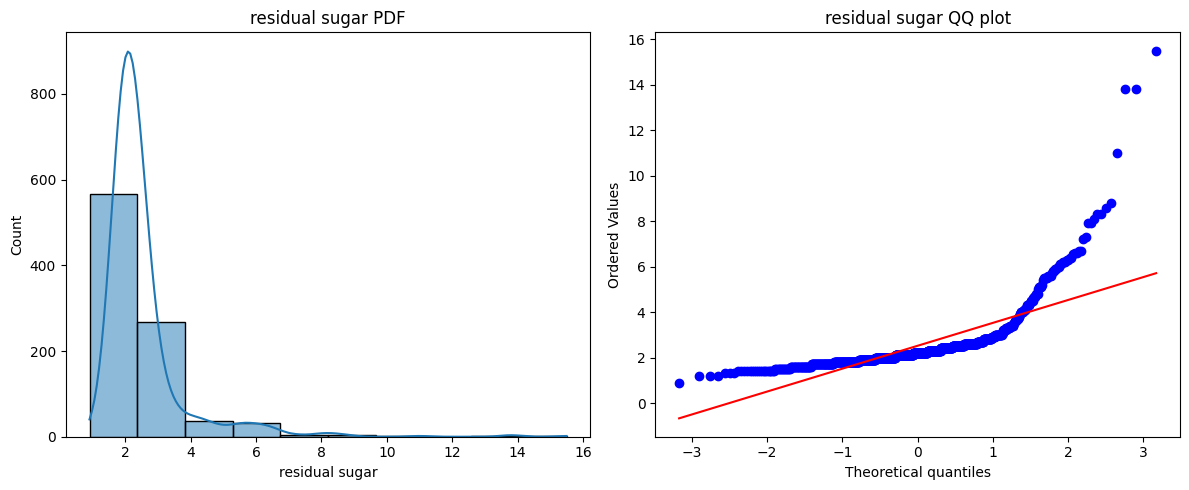

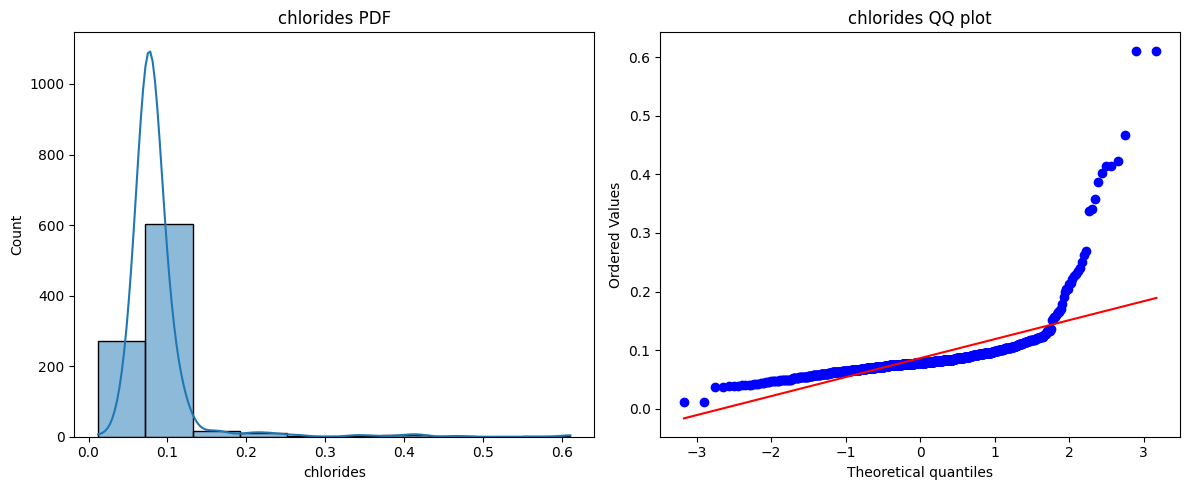

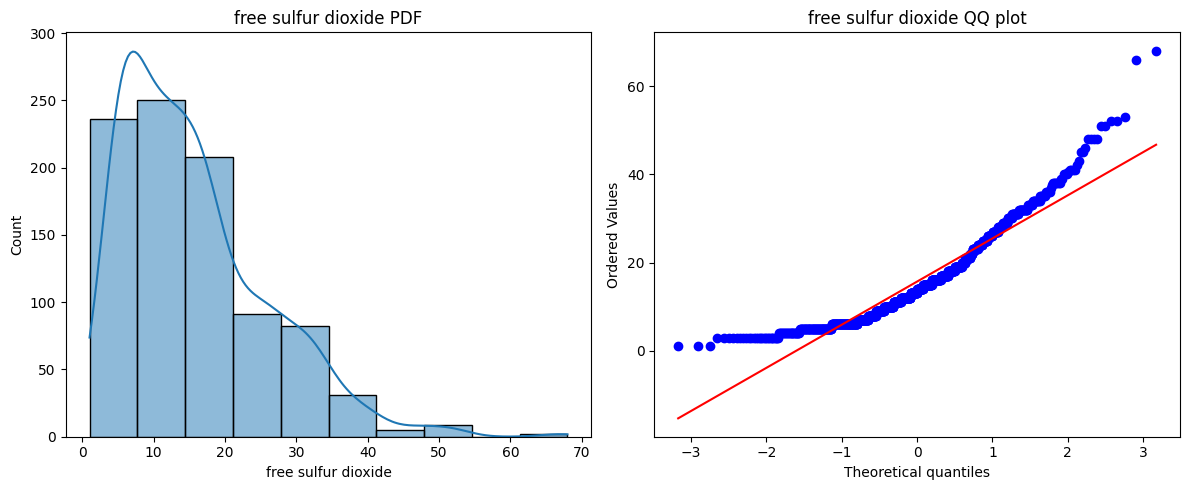

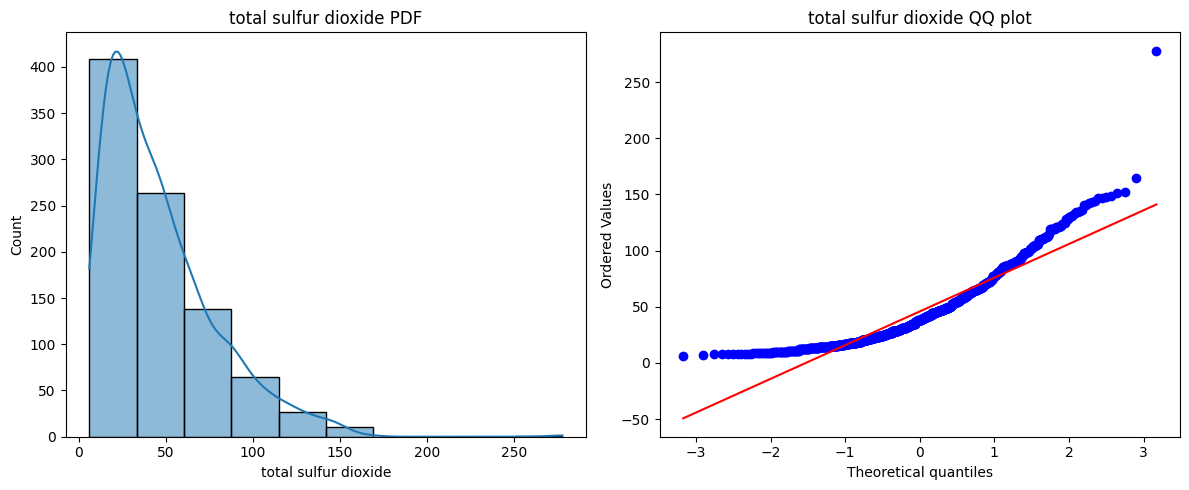

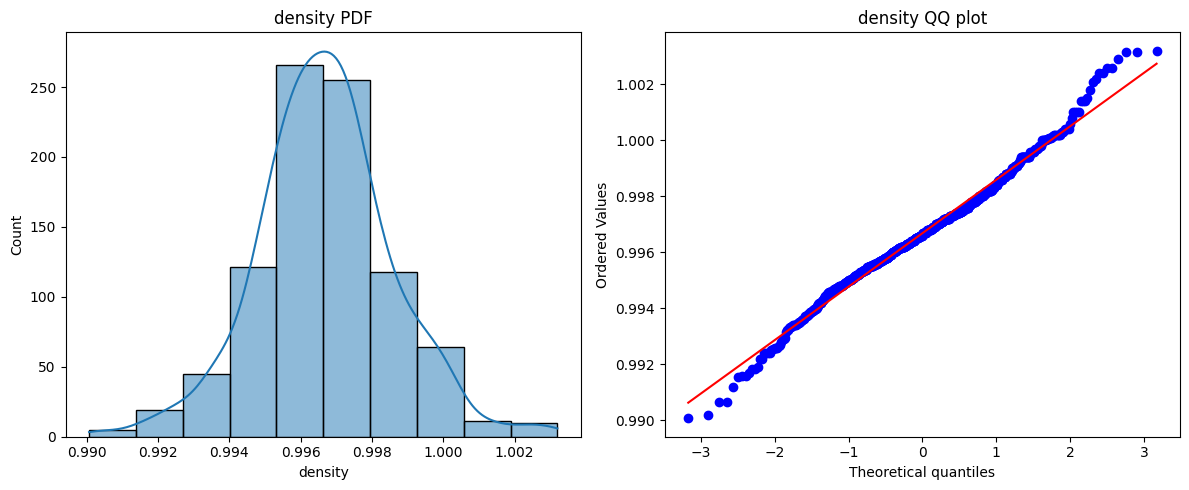

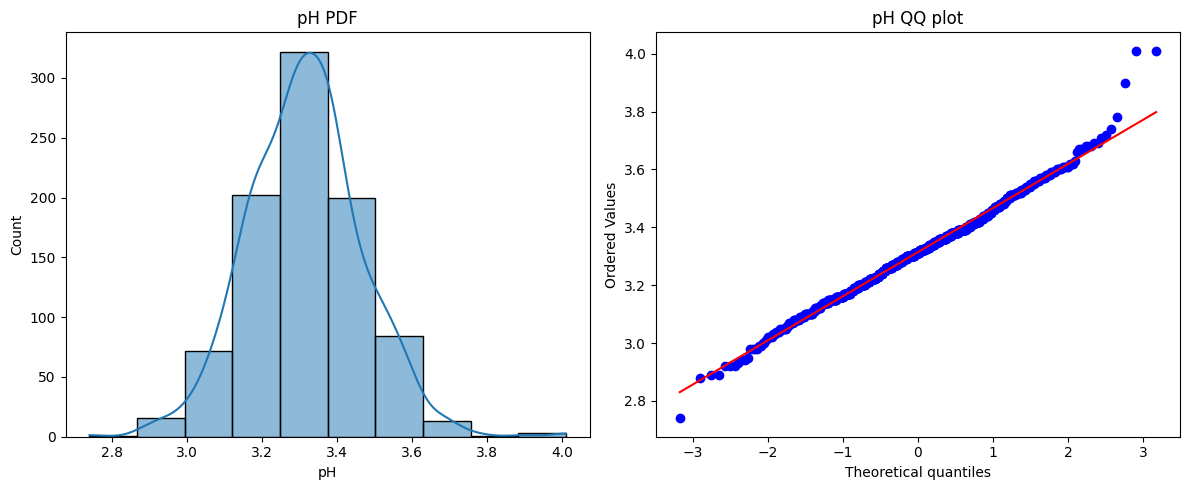

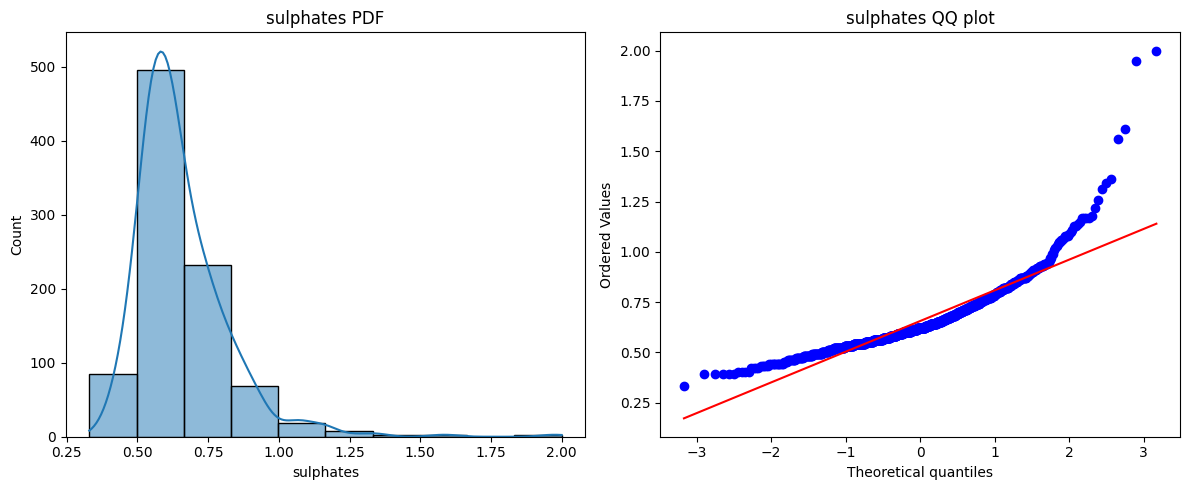

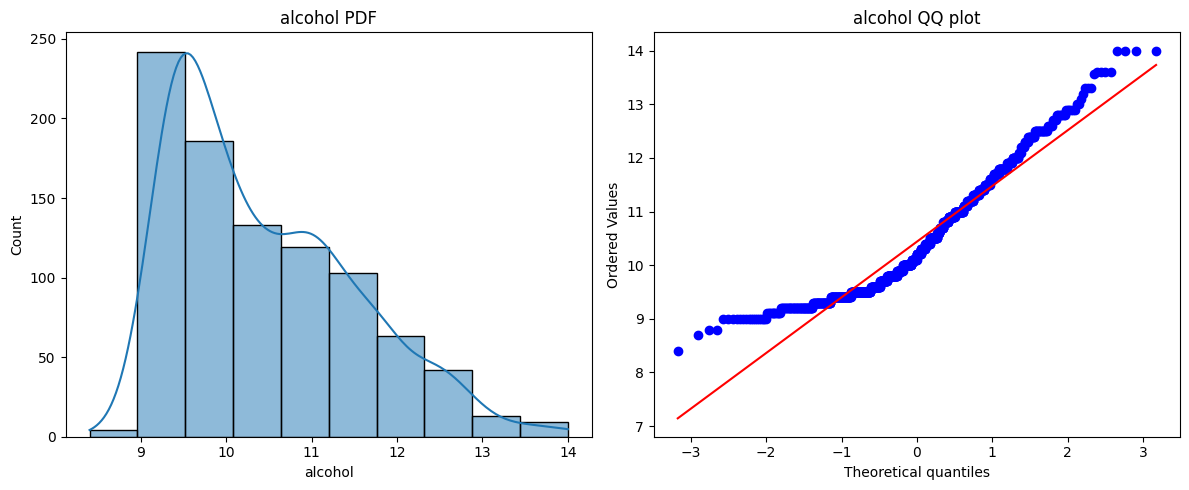

In [37]:
for column in xtrain.columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(xtrain[column], kde=True, bins=10)
    plt.title(f'{column} PDF')

    plt.subplot(1, 2, 2)
    stats.probplot(xtrain[column], dist='norm', plot=plt)
    plt.title(f'{column} QQ plot')

    plt.tight_layout()
    plt.show()

### Avoid Density and ph column. Their distribution in pdf

In [43]:
clf.fit(xtrain,ytrain)
clf2.fit(xtrain,ytrain)

y_pred = clf.predict(xtest)
y_pred1 = clf2.predict(xtest)

print(f'accuracy_score of LR is {accuracy_score(ytest,y_pred)}')
print(f'accuracy_score of DT is {accuracy_score(ytest,y_pred1)}')

accuracy_score of LR is 0.6069868995633187
accuracy_score of DT is 0.5327510917030568


c:\Users\parth\OneDrive\Desktop\one\ml100\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
trans4mer = FunctionTransformer(func=np.log1p)
trans4mer

FunctionTransformer(func=<ufunc 'log1p'>)

In [40]:
xtrain_transformer = trans4mer.fit_transform(xtrain)
xtest_transformer = trans4mer.fit_transform(xtest)

In [41]:
xtrain_transformer

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,2.251292,0.246860,0.444686,1.029619,0.088011,3.583519,4.644391,0.691596,1.458615,0.559616,2.442347
758,2.388763,0.277632,0.444686,1.098612,0.070458,1.386294,2.197225,0.690814,1.423108,0.548121,2.517696
636,2.292535,0.270027,0.307485,1.280934,0.054488,2.397895,3.688879,0.690955,1.481605,0.524729,2.549445
1109,2.028148,0.631272,0.039221,1.163151,0.063913,2.564949,3.044522,0.691326,1.510722,0.444686,2.388763
743,2.151762,0.350657,0.223144,1.589235,0.098940,3.367296,4.510860,0.692067,1.423108,0.451076,2.312535
...,...,...,...,...,...,...,...,...,...,...,...
1044,2.041220,0.712950,0.076961,1.193922,0.064851,2.995732,3.496508,0.691386,1.508512,0.451076,2.484907
1095,2.197225,0.329304,0.262364,1.064711,0.071390,3.496508,4.442651,0.691731,1.479329,0.476234,2.302585
1130,2.128232,0.300105,0.285179,1.223775,0.065788,2.302585,3.295837,0.690494,1.472472,0.470004,2.557227
860,2.186051,0.451076,0.270027,1.098612,0.076035,2.397895,4.382027,0.691531,1.456287,0.524729,2.351375


In [42]:
clf.fit(xtrain_transformer,ytrain)
clf2.fit(xtrain_transformer,ytrain)

y_pred = clf.predict(xtest)
y_pred1 = clf2.predict(xtest)

print(f'accuracy_score of LR is {accuracy_score(ytest,y_pred)}')
print(f'accuracy_score of DT is {accuracy_score(ytest,y_pred1)}')

accuracy_score of LR is 0.5327510917030568
accuracy_score of DT is 0.048034934497816595


c:\Users\parth\OneDrive\Desktop\one\ml100\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
clf.fit(xtrain_transformer,ytrain)
clf2.fit(xtrain_transformer,ytrain)

y_pred = clf.predict(xtest_transformer)
y_pred1 = clf2.predict(xtest_transformer)

print(f'accuracy_score of LR is {accuracy_score(ytest,y_pred)}')
print(f'accuracy_score of DT is {accuracy_score(ytest,y_pred1)}')

accuracy_score of LR is 0.6157205240174672
accuracy_score of DT is 0.5327510917030568


c:\Users\parth\OneDrive\Desktop\one\ml100\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### It is better to go with xtest_transform, which give better output than xtest

### acuuracy of linear regression is more than decision Classifier

In [46]:
x_transformed = trans4mer.fit_transform(x)


print(f'LR {np.mean(cross_val_score(clf,x_transformed,y,scoring='accuracy',cv=10))}')
print(f'DT {np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10))}')


c:\Users\parth\OneDrive\Desktop\one\ml100\venv\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\parth\OneDrive\Desktop\one\ml100\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\parth\OneDrive\Desktop\one\ml100\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_i

LR 0.5844164759725401
DT 0.4313729977116704


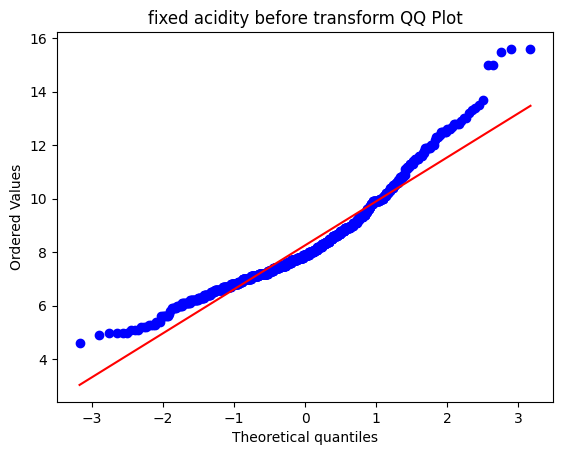

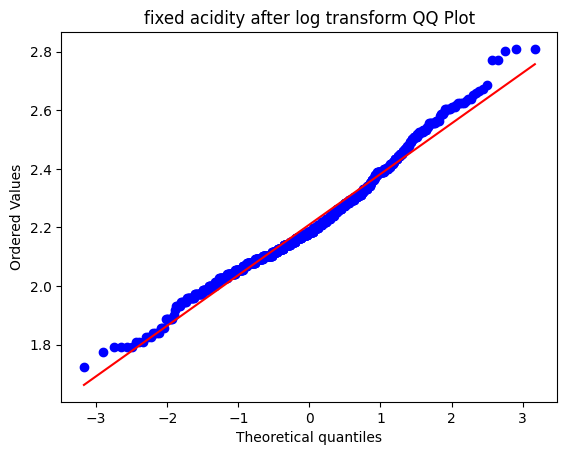

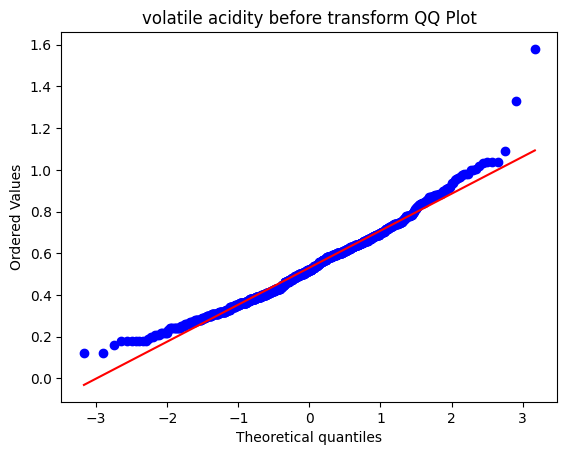

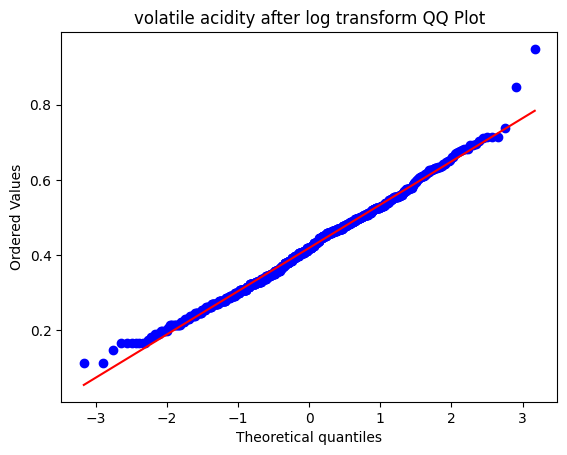

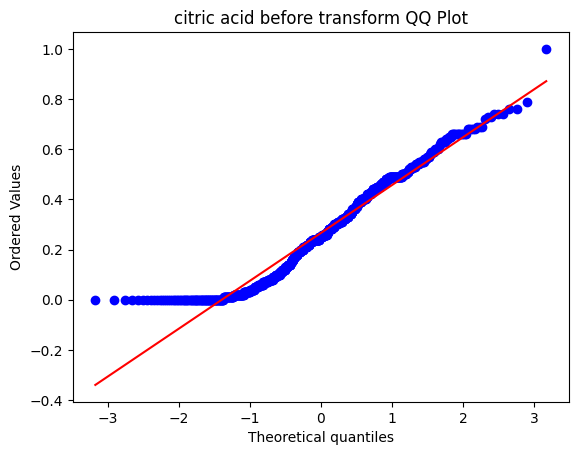

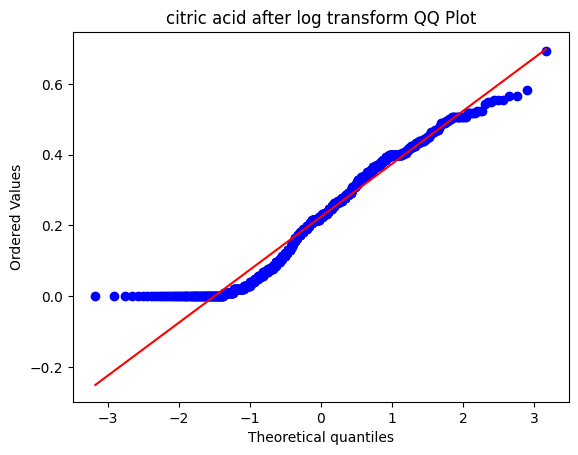

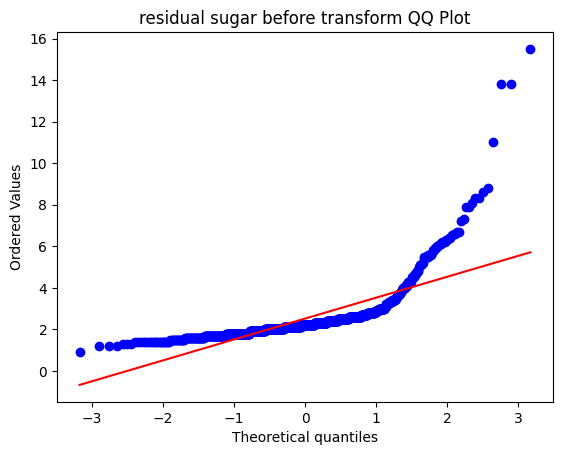

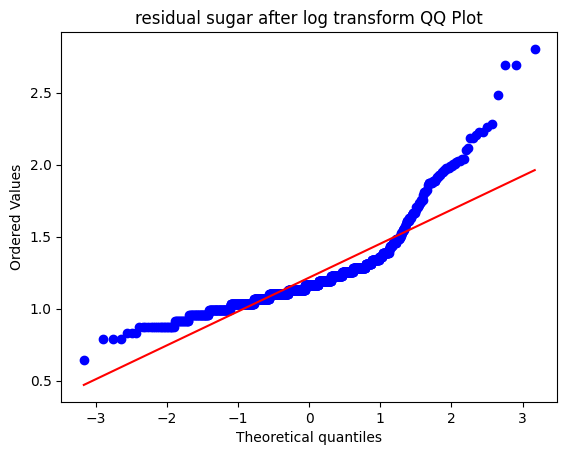

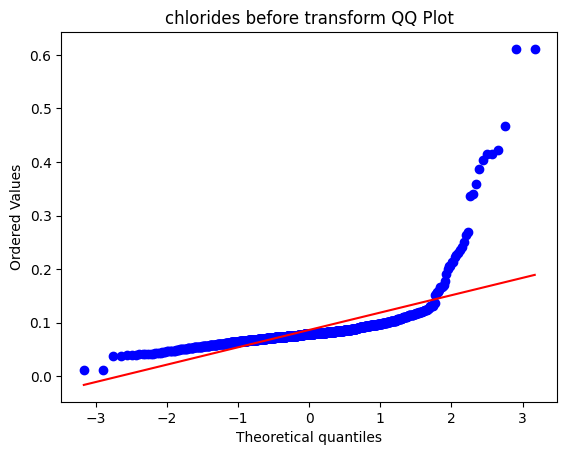

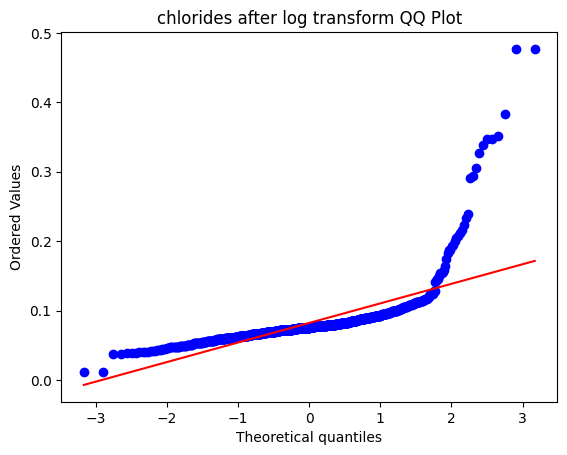

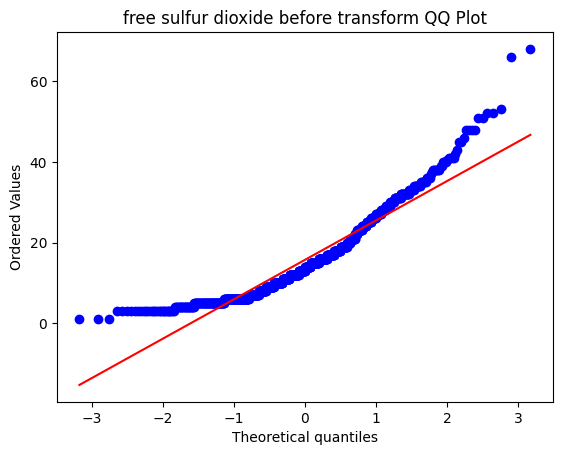

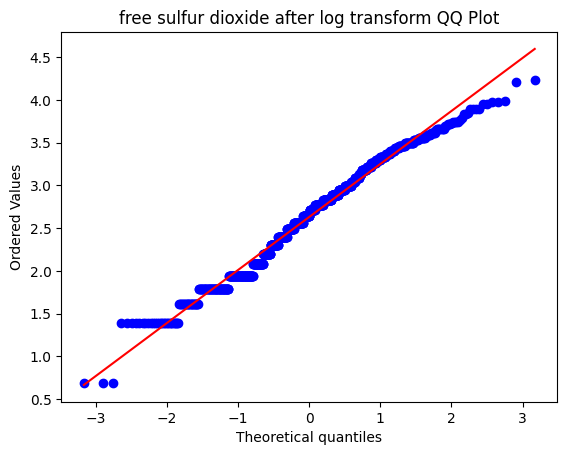

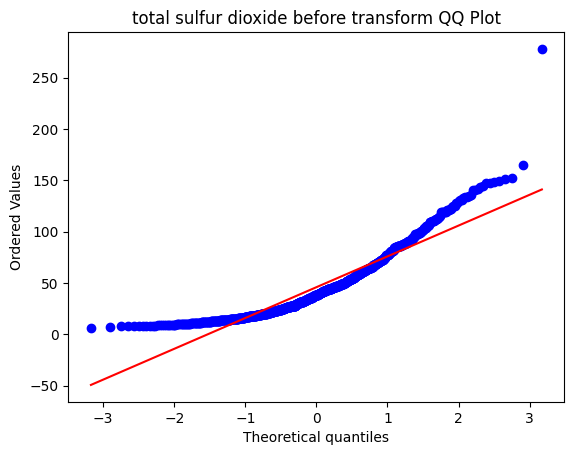

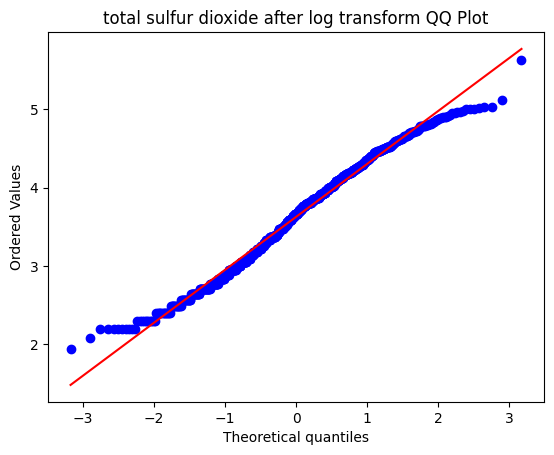

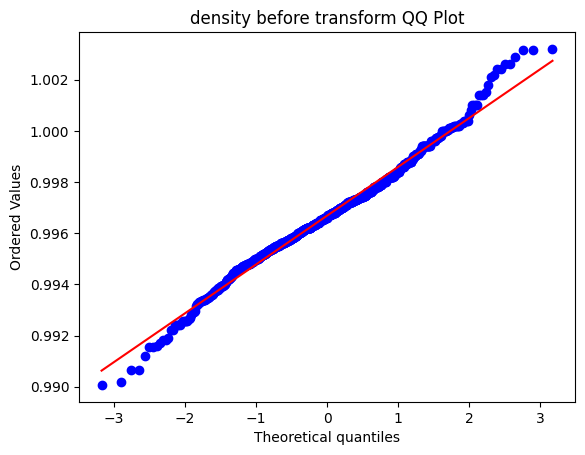

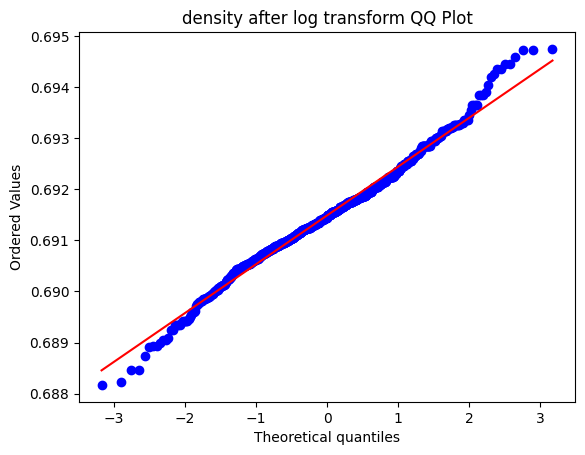

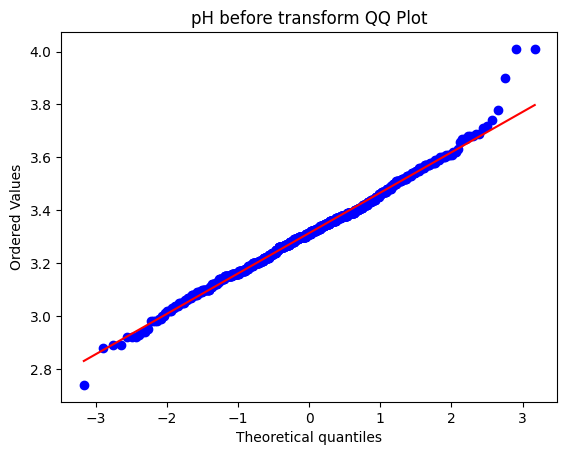

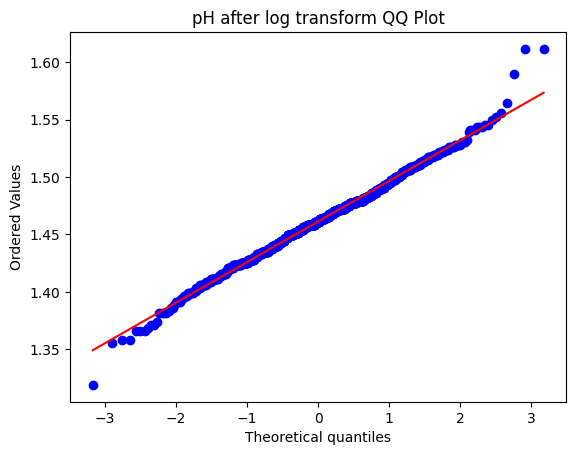

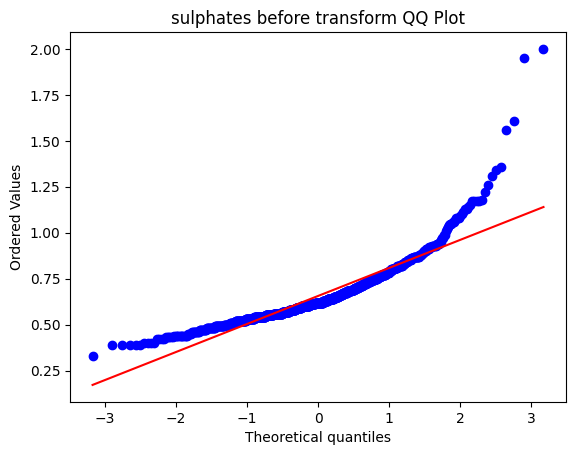

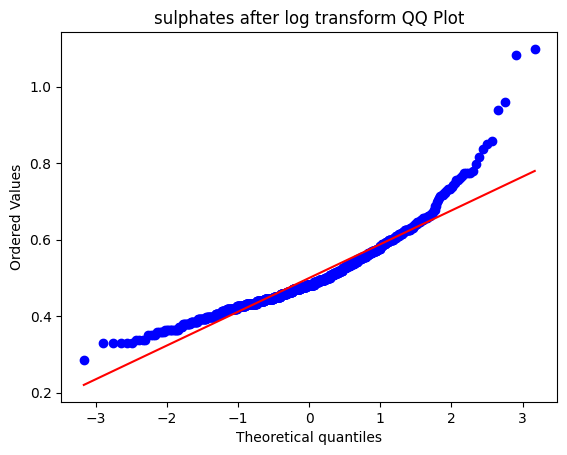

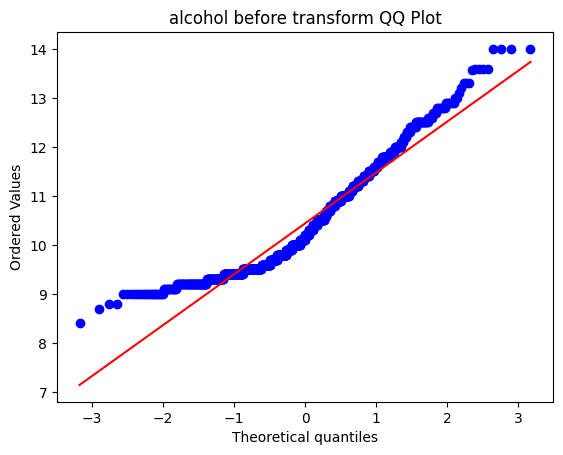

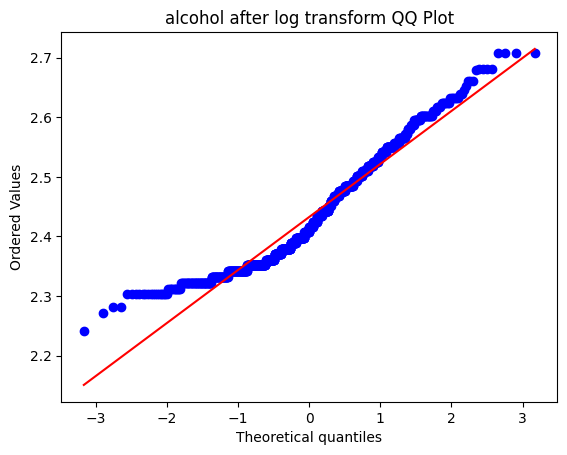

In [48]:
for column in xtrain.columns:
    # Plot QQ plot before transformation
  
    stats.probplot(xtrain[column], dist="norm", plot=plt)
    plt.title(f'{column} before transform QQ Plot')
    plt.show()

    # Apply log transformation
    xtrain_transformed = xtrain.copy()  # Create a copy to avoid modifying the original
    xtrain_transformed[column] = np.log1p(xtrain_transformed[column]) #Use log1p to handle zero values

    # Plot QQ plot after transformation

    stats.probplot(xtrain_transformed[column], dist="norm", plot=plt)
    plt.title(f'{column} after log transform QQ Plot')
    plt.show()